In [32]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time

pd.options.display.float_format = '{:.9f}'.format

In [4]:
data = pd.read_csv(
    '../1237+25/res_iter_p_pdot_1237_D-14.txt',
    sep='\s+',
    names=['Period, s', 'P_dot, s/s', 'STD_res, ms'],
    dtype={'Period, s': str, 'P_dot, s/s': str, 'STD_res, ms': np.float64}
)

In [5]:
data.head()

,"Period, s","P_dot, s/s","STD_res, ms"
0,0.72330,-10.0D-14,395610.002283932
1,0.72330,-9.97D-14,393432.554697908
2,0.72330,-9.94D-14,401145.401188865
3,0.72330,-9.91D-14,389259.771763679
4,0.72330,-9.88D-14,399320.026250416


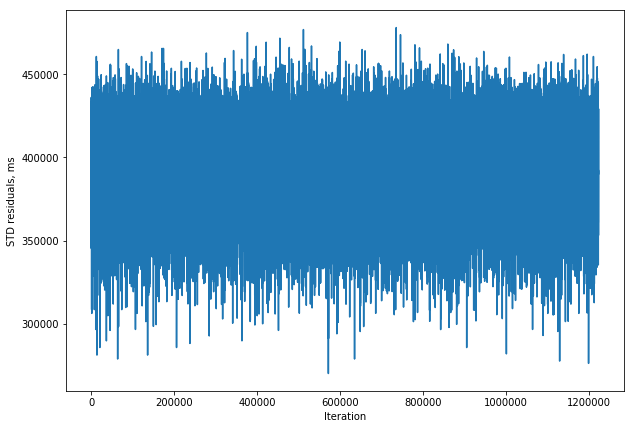

In [6]:
plt.figure(figsize=(10,7))
plt.xlabel('Iteration')
plt.ylabel('STD residuals, ms')
plt.plot(data['STD_res, ms'])
#plt.savefig('STD_res_p_pdot_prec_1237+25.png', format='png', dpi=150)
plt.show()

In [7]:
data_s = data.sort_values(by='STD_res, ms', ascending=True).reset_index(drop=True)

In [8]:
best = data_s.head(100)

In [10]:
best

,"Period, s","P_dot, s/s","STD_res, ms"
0,0.72334674,-0.52D-14,270234.653789980
1,0.72339804,0.2D-14,276317.514034335
2,0.72339234,-0.43D-14,277709.849013535
3,0.7233519,0.17D-14,278939.654613044
4,0.72335190,0.17D-14,278939.654613044
5,0.7233111,-0.43D-14,281307.147117417
6,0.72331110,-0.43D-14,281307.147117417
7,0.72338184,-0.55D-14,282033.628949039
8,0.72337401,0.29D-14,285821.579857852
9,0.72331680,0.2D-14,285842.509709598


In [20]:
best.to_csv('bestPPdot_1237.txt', sep=' ', float_format='%.7f', index=False, header=False)

In [21]:
best

,"Period, s","P_dot, s/s","STD_res, ms"
0,0.72334674,-0.52D-14,270234.653789980
1,0.72339804,0.2D-14,276317.514034335
2,0.72339234,-0.43D-14,277709.849013535
3,0.7233519,0.17D-14,278939.654613044
4,0.72335190,0.17D-14,278939.654613044
5,0.7233111,-0.43D-14,281307.147117417
6,0.72331110,-0.43D-14,281307.147117417
7,0.72338184,-0.55D-14,282033.628949039
8,0.72337401,0.29D-14,285821.579857852
9,0.72331680,0.2D-14,285842.509709598


### Чтение файла с периодом

In [11]:
pd.options.display.float_format = '{:.10f}'.format
data = pd.read_csv(
    '../1112+50/all_pulses/res_iter_p_1112.txt',
    sep='\s+',
    names=['Freq, s-1', 'STD_res, us'],
    dtype={'Freq, s-1': np.float64, 'STD_res, us': np.float64}
)

In [12]:
data.head()

,"Freq, s-1","STD_res, us"
0,0.6037100000,473314.6623694107
1,0.6037200000,481442.0180857482
2,0.6037300000,481443.5909364885
3,0.6037400000,470540.9174140784
4,0.6037500000,489775.5799249791


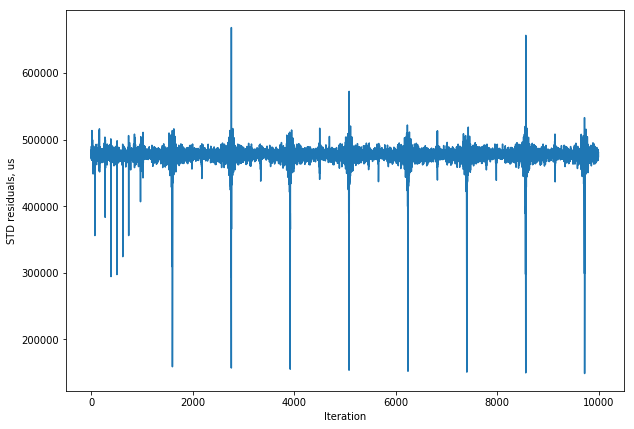

In [13]:
plt.figure(figsize=(10,7))
plt.xlabel('Iteration')
plt.ylabel('STD residuals, us')
plt.plot(data['STD_res, us'])
#plt.savefig('res.png', format='png', dpi=150)
plt.show()

In [14]:
data_s = data.sort_values(by='STD_res, us', ascending=True).reset_index(drop=True)

In [15]:
data_s

,"Freq, s-1","STD_res, us"
0,0.6037972600,148952.2099335583
1,0.6037972500,148952.2118780513
2,0.6037856600,149929.9059952637
3,0.6037856500,149929.9099972428
4,0.6037856400,149929.9125663773
5,0.6037740400,151071.7536589501
6,0.6037740500,151071.7539496708
7,0.6037740300,151071.7577024304
8,0.6037624500,152374.0715832138
9,0.6037624400,152374.0749860204


In [184]:
print(len(data_300), len(data_100))

8 8


In [185]:
data_300.intersection(data_100).intersection(data_34).intersection(data_12)

{0.72331912,
 0.72333072,
 0.72334233,
 0.72335394,
 0.72336554,
 0.72337715,
 0.72338875}

In [10]:
best.to_csv('bestP.txt', sep=' ', float_format='%.10f', index=False, header=False)

### Чтение файла с координатами

In [12]:
data = pd.read_csv(
    'res_iter_coords.txt',
    sep=' ',
    names=['RAJ', 'DECJ', 'STD_res, ms'],
    dtype={'RAJ': str, 'DECJ': str, 'STD_res, ms': np.float64}
)

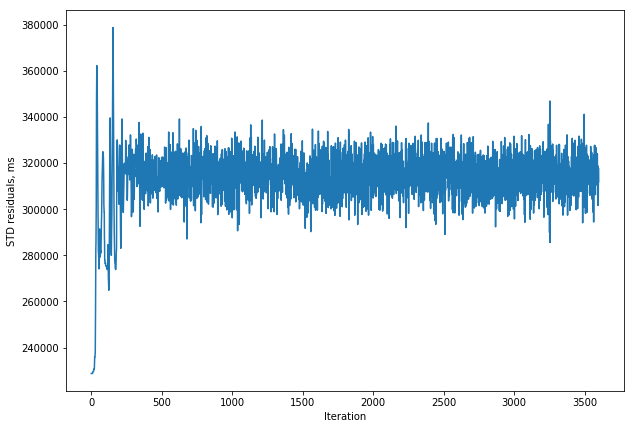

In [14]:
plt.figure(figsize=(10,7))
plt.xlabel('Iteration')
plt.ylabel('STD residuals, ms')
plt.plot(data['STD_res, ms'])
#plt.savefig('res.png', format='png', dpi=150)
plt.show()

In [15]:
data_s = data.sort_values(by='STD_res, ms', ascending=True).reset_index(drop=True)

In [16]:
data_s.head(20)

,RAJ,DECJ,"STD_res, ms"
0,09:46:00,09:52:01,228762.6766550061
1,09:46:00,09:52:00,228762.6774923834
2,09:46:00,09:52:06,228762.6778992576
3,09:46:00,09:52:03,228762.6779669397
4,09:46:00,09:52:10,228762.6794504857
5,09:46:00,09:52:15,228762.6808422789
6,09:46:00,09:52:21,228762.6812340713
7,09:46:00,09:52:28,228762.6819034027
8,09:46:00,09:52:36,228762.6836539868
9,09:46:00,09:52:45,229090.9068074306


### Чтение файла остаточных уклонений

In [2]:
resid = pd.read_csv(
    './1112+50/set_1_year/set_4_sing/resid.ascii',
    sep=' ',
    names=['MJD', 'Resid, us', 'err'],
    dtype={'MJD': np.float64, 'Resid, us': np.float64, 'err': np.float32}
)

FileNotFoundError: File b'./1112+50/set_1_year/set_4_sing/resid.ascii' does not exist

In [ ]:
np.std(resid['Resid, us'])

NameError: name 'resid' is not defined

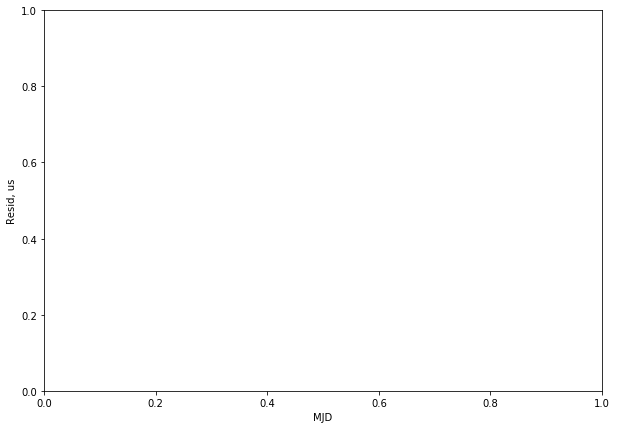

In [3]:
plt.figure(figsize=(10,7))
plt.xlabel('MJD')
plt.ylabel('Resid, us')
plt.plot(resid['MJD'], resid['Resid, us'], '+')
plt.savefig('resid.png', format='png', dpi=150)
#plt.show()

### Чтение координат с периодом

In [57]:
p_coors = pd.read_csv(
    '../tulbashev/fiting_yes/1112+50/5. from_7_sign_0.5_degrees/res_iter_p_coords_1112.txt',
    sep='\s+',
    names=['Freq, s-1', 'RAJ', 'DECJ', 'STD_res, us'],
    dtype={'Freq, s-1': np.float64, 'RAJ': str, 'DECJ': str, 'STD_res, us': np.float64}
)
pd.options.display.float_format = '{:.10f}'.format

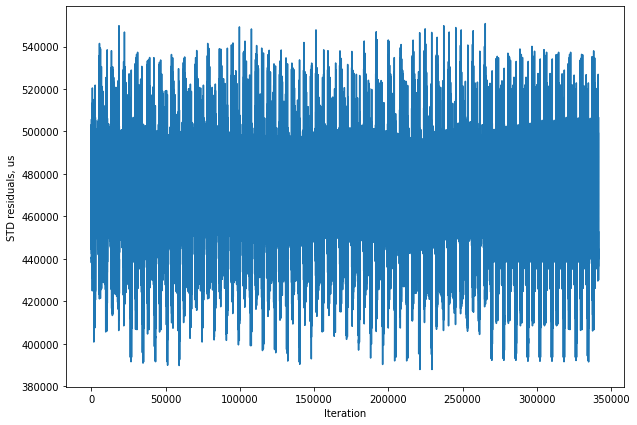

In [58]:
plt.figure(figsize=(10,7))
plt.xlabel('Iteration')
plt.ylabel('STD residuals, us')
plt.plot(p_coors['STD_res, us'])
#plt.savefig('res.png', format='png', dpi=150)
plt.show()

In [59]:
p_coors_s = p_coors.sort_values(by='STD_res, us', ascending=True).reset_index(drop=True)

In [60]:
p_coors_s.head(1000)

,"Freq, s-1",RAJ,DECJ,"STD_res, us"
0,0.6037044870,11:10:18,50:40:52,387873.7025291064
1,0.6037044840,11:10:18,50:41:52,387873.7159659623
2,0.6037044840,11:10:18,50:42:32,388404.4190412132
3,0.6037044840,11:10:18,50:42:12,388404.4214700703
4,0.6037044840,11:10:18,50:42:52,388404.4238437608
...,...,...,...,...
995,0.6037044105,11:07:58,50:44:32,400890.1034690097
996,0.6037044480,11:07:38,50:38:12,400903.9654327530
997,0.6037044510,11:09:38,50:16:52,400911.5723040535
998,0.6037044510,11:09:38,50:17:12,400939.5922653039


## Код позволяющий выделить **ВСЕ** хорошие решения с разными периодами

In [61]:
best_sol = pd.DataFrame(columns=[
    'Freq, s-1', 
    'RAJ',
    'DECJ',
    'STD_res, us'
])
tres = 400000
idx = 0
for i in range(len(p_coors_s)):
    if p_coors_s['STD_res, us'][i] > tres:
        break
    if p_coors_s['Freq, s-1'][i] not in list(best_sol['Freq, s-1']):
        best_sol.loc[idx] = [
            np.float64(p_coors_s['Freq, s-1'][i]),
            p_coors_s['RAJ'][i],
            p_coors_s['DECJ'][i],
            p_coors_s['STD_res, us'][i]
        ]
        idx += 1

In [62]:
best_sol

,"Freq, s-1",RAJ,DECJ,"STD_res, us"
0,0.6037044870,11:10:18,50:40:52,387873.7025291064
1,0.6037044840,11:10:18,50:41:52,387873.7159659623
2,0.6037044240,11:09:58,50:27:52,389742.6799221134
3,0.6037044210,11:10:58,50:41:32,389891.4836983219
4,0.6037044750,11:07:18,50:37:32,390252.2451394772
5,0.6037044540,11:10:38,50:43:12,390346.8608221266
6,0.6037044150,11:09:58,50:15:32,390889.5343142433
7,0.6037044126,11:10:58,50:43:52,391454.0640881501
8,0.6037044120,11:09:58,50:15:52,391534.2586484171
9,0.6037044180,11:10:58,50:41:52,391545.4173798098


## Код, позволяющий расшичать разность полученных с истинными координатами

In [63]:
FREQUENSY = 0.60370441726606
RA_COORD = '11:15:38.4'
DEC_COORD =  '50:30:12.29'

delta_table = pd.DataFrame(columns=['delta_freq', 'delta_ra', 'delta_dec'])
coords_puls = SkyCoord(f'{RA_COORD} {DEC_COORD}',unit=(u.deg, u.deg))

for idx, row in best_sol.iterrows():
    coords_solu = SkyCoord(f'{best_sol["RAJ"][idx]} {best_sol["DECJ"][idx]}', unit=(u.deg, u.deg))
    delta_ra = (abs(coords_puls.ra - coords_solu.ra)).to_string(sep=":")
    delta_dec = (abs(coords_puls.dec - coords_solu.dec)).to_string(sep=":")
    delta_period = (abs(FREQUENSY - float(best_sol["Freq, s-1"][idx])))
                    
    delta_table.loc[idx] = [
        delta_period,
        delta_ra,
        delta_dec
    ]

In [64]:
delta_table

,delta_freq,delta_ra,delta_dec
0,0.0000000697,0:05:20.4,0:10:39.71
1,0.0000000667,0:05:20.4,0:11:39.71
2,0.0000000067,0:05:40.4,0:02:20.29
3,0.0000000037,0:04:40.4,0:11:19.71
4,0.0000000577,0:08:20.4,0:07:19.71
5,0.0000000367,0:05:00.4,0:12:59.71
6,0.0000000023,0:05:40.4,0:14:40.29
7,0.0000000047,0:04:40.4,0:13:39.71
8,0.0000000053,0:05:40.4,0:14:20.29
9,0.0000000007,0:04:40.4,0:11:39.71


In [86]:
best_sol.to_csv('best_par_1237.txt', sep=' ', float_format='%.10f', index=False, header=False)

## Работа с МПИ

In [22]:
toa_1112 = np.genfromtxt('../1112+50/1112.tim', dtype=str).T 

In [23]:
toa_1112[4]

array(['58151.950027262494', '58152.94728675419', '58153.94457039485',
       '58154.94183299765', '58155.93910544059', '58156.93636923509',
       '58157.93365456872', '58158.930922943866', '58159.92817477172',
       '58160.925446342946', '58161.92272373871', '58162.91999406898',
       '58163.91726988338', '58164.91452784561', '58165.91180629021',
       '58166.90906685733', '58167.90634795102', '58168.90361113006',
       '58169.900875647276', '58170.898141464844', '58172.89269618643',
       '58184.85992007199', '58185.85720475101', '58186.85447145995',
       '58187.851739344886', '58188.84900845442', '58189.846278650504',
       '58190.84355015696', '58191.840822751066', '58192.83807727996',
       '58193.83535218671', '58194.83262817329', '58195.82988615742',
       '58196.827164413386', '58197.82442451074', '58198.82170489743',
       '58199.818967187144', '58200.81624961912', '58201.81351403124',
       '58202.81077935457', '58204.80531304074', '58205.80258133471',
       '58

In [24]:
dt = []
for i in range(1,len(toa_1112[4])):
    time_1 = Time(np.float64(toa_1112[4][i-1]), format='mjd', scale='utc', precision=7)
    time_2 = Time(np.float64(toa_1112[4][i]), format='mjd', scale='utc', precision=7)
    dt.append(time_2 - time_1)
    

In [26]:
for d in dt:
    print(d.value*u.day.to(u.second)/(1/0.603704417) - d.value*u.day.to(u.second)/(1/0.603785))

-6.943290763920231
-6.943458897956589
-6.943312424540636
-6.943380935321329
-6.943320721598866
-6.9434706850443035
-6.943352613794559
-6.943237405386753
-6.943374866095837
-6.943415418667428
-6.943366226085345
-6.943404408630158
-6.943280115221569
-6.943422721065872
-6.943298251411761
-6.943441164999967
-6.94331643654732
-6.943325753447425
-6.943334806979692
-13.886830350369564
-83.32025492482353
-6.943466127399006
-6.943341013029567
-6.943349200766534
-6.943357726850081
-6.943365291852388
-6.94337441513926
-6.943381987737666
-6.943256211015978
-6.9433980892572436
-6.943405607402383
-6.943280267703813
-6.943421407704591
-6.943294980737846
-6.9434362426254665
-6.9433102447292185
-6.943450482664048
-6.943325021689816
-6.94333136593923
-13.886683894030284
-6.943352048605448
-6.943358849683136
-6.9433652922089095
-6.943393189721974
-13.886740213216399
-6.9433902327218675
-6.943396316077269
-6.943268502654973
-6.94340779997583
-6.943413573055295
-6.943285341149021
-6.943424555385718
-6.9432

In [76]:
0.603785/0.603135

1.0010777023386142

In [79]:
0.603135/0.603785

0.9989234578533749